<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [2]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




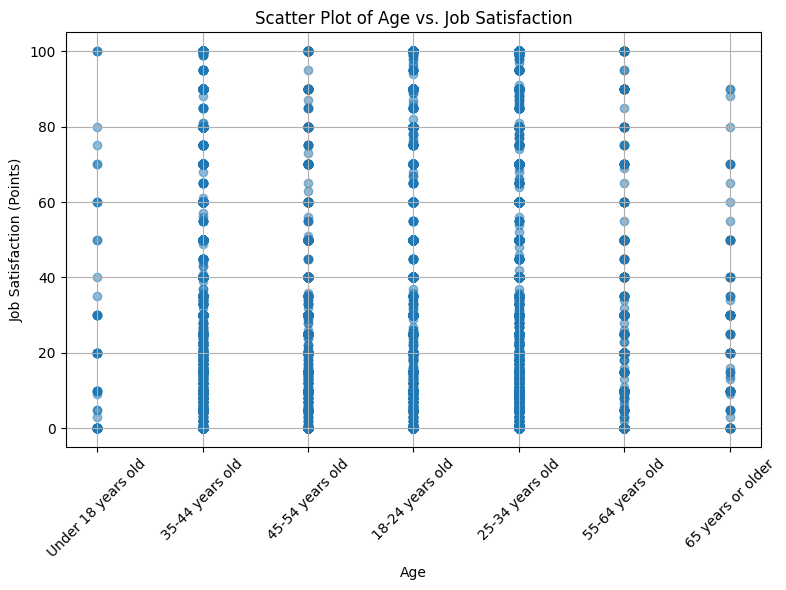

In [4]:
# Filter out 'Prefer not to say' from Age
df_filtered = df[df['Age'] != 'Prefer not to say'].copy()
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['Age'], df_filtered['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


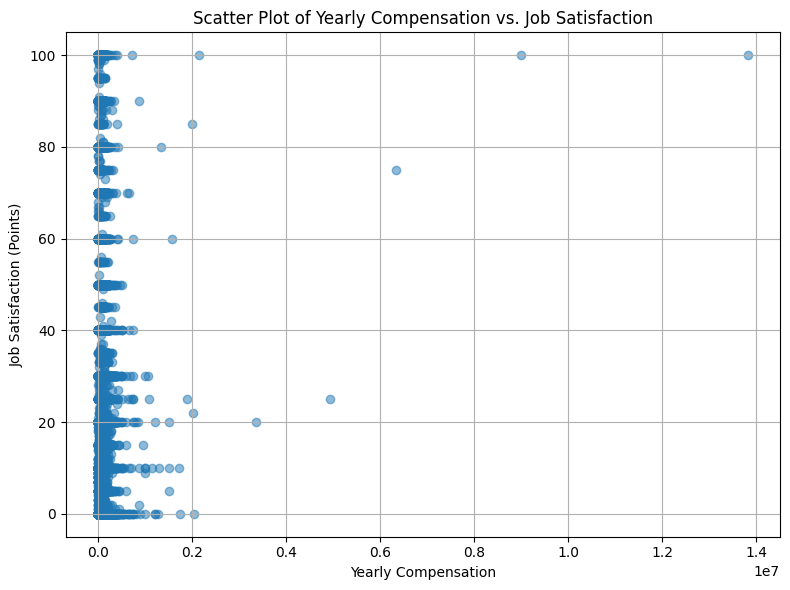

In [5]:
# Filter out NaN values in the relevant columns
df_comp_sat = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6']).copy()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_comp_sat['ConvertedCompYearly'], df_comp_sat['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


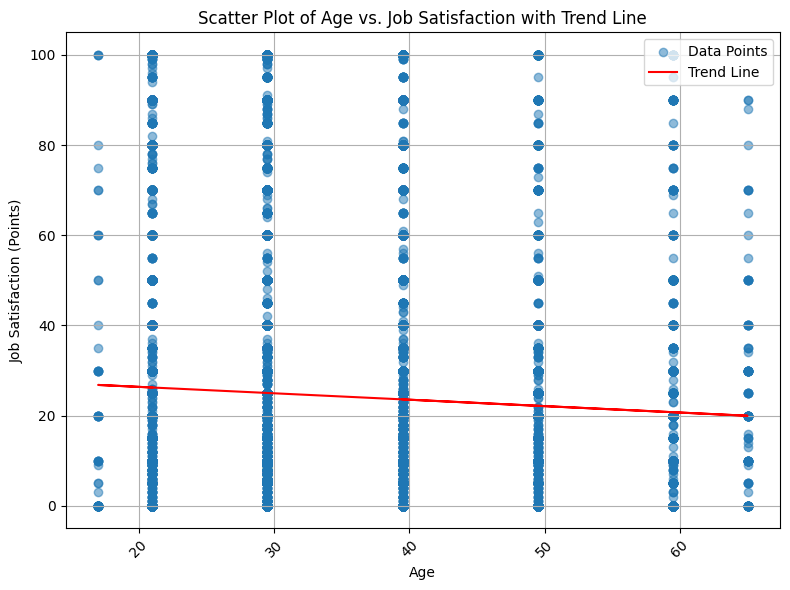

In [12]:
# Map age ranges to a single numerical value (e.g., the midpoint of the range)
def map_age_to_numeric(age_range):
    if pd.isna(age_range):
        return np.nan
    elif age_range == 'Under 18 years old':
        return 17  # or some appropriate value
    elif age_range == '65 years or older':
        return 65 # or some appropriate value
    elif isinstance(age_range, str) and '-' in age_range:
        try:
            lower, upper = age_range.replace(' years old', '').split('-')
            return (int(lower) + int(upper)) / 2
        except ValueError:
            return np.nan
    else:
        return np.nan # Handle any other unexpected values

df_filtered['Age_numeric'] = df_filtered['Age'].apply(map_age_to_numeric)


# Drop rows where Age could not be converted to numeric or JobSatPoints_6 is missing
df_filtered.dropna(subset=['Age_numeric', 'JobSatPoints_6'], inplace=True)


# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['Age_numeric'], df_filtered['JobSatPoints_6'], alpha=0.5, label='Data Points')

# Add a regression line
X = df_filtered['Age_numeric'].values.reshape(-1, 1)
y = df_filtered['JobSatPoints_6'].values

model = LinearRegression()
model.fit(X, y)

# Predict values for the trend line
y_pred = model.predict(X)

# Plot the trend line
plt.plot(X, y_pred, color='red', label='Trend Line')

plt.title('Scatter Plot of Age vs. Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
# Rotate x-axis labels for better readability if they are dense
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


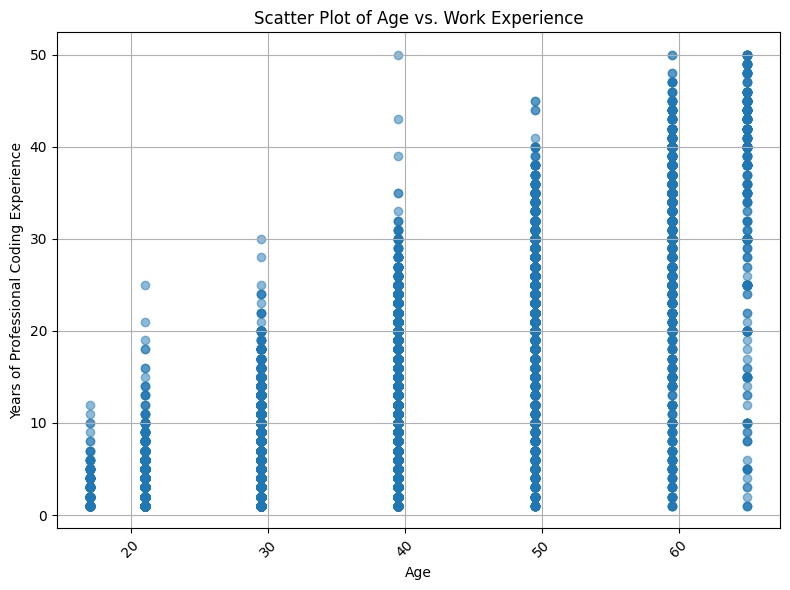

In [13]:
# Filter out 'Prefer not to say' from Age and 'NA' from YearsCodePro
df_experience = df[(df['Age'] != 'Prefer not to say') & (df['YearsCodePro'] != 'NA')].copy()

# Map age ranges to a single numerical value (using the function defined earlier)
df_experience['Age_numeric'] = df_experience['Age'].apply(map_age_to_numeric)

# Convert 'YearsCodePro' to numeric, handling potential '< 1 year' and '> 50 years' cases
def map_years_code_pro_to_numeric(years_str):
    if pd.isna(years_str) or years_str == 'NA':
        return np.nan
    elif years_str == '< 1 year':
        return 0.5 # or some appropriate small value
    elif years_str == '> 50 years':
        return 55 # or some appropriate large value
    else:
        try:
            return int(years_str)
        except ValueError:
            return np.nan

df_experience['YearsCodePro_numeric'] = df_experience['YearsCodePro'].apply(map_years_code_pro_to_numeric)

# Drop rows where either Age or YearsCodePro could not be converted to numeric
df_experience.dropna(subset=['Age_numeric', 'YearsCodePro_numeric'], inplace=True)


# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_experience['Age_numeric'], df_experience['YearsCodePro_numeric'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


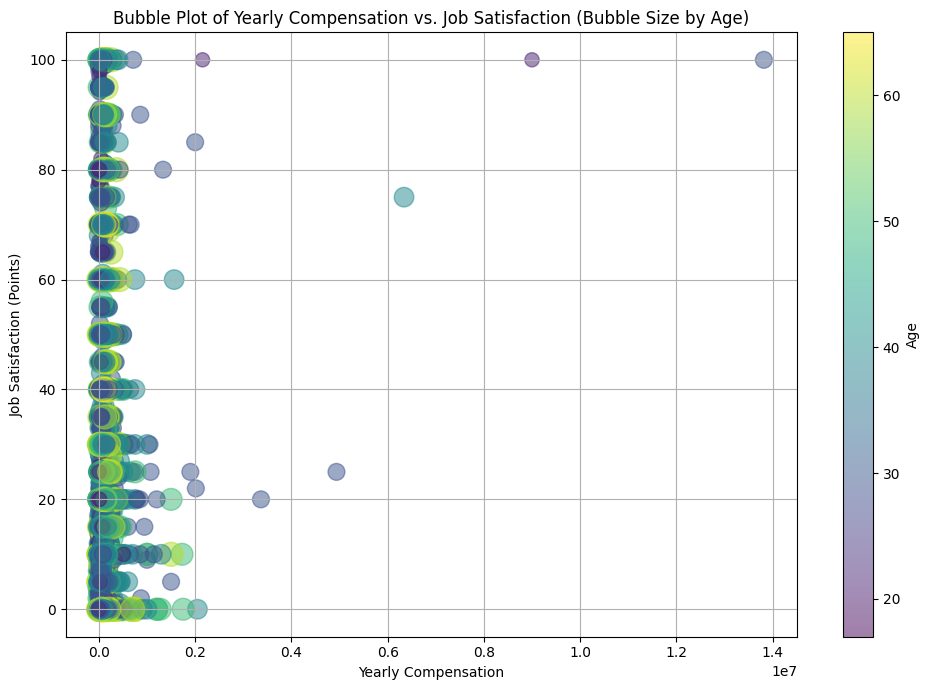

In [15]:
# First, create a temporary DataFrame with numeric age from the original df
df_age_numeric_temp = df.copy()
df_age_numeric_temp['Age_numeric'] = df_age_numeric_temp['Age'].apply(map_age_to_numeric)

# Merge the compensation/satisfaction data with the numeric age data
df_bubble = pd.merge(df_comp_sat, df_age_numeric_temp[['Age_numeric']], left_index=True, right_index=True)

# Drop rows with NaN in any of the required columns for the bubble plot
df_bubble.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'], inplace=True)

scale_factor = 5
sizes = df_bubble['Age_numeric'] * scale_factor

# Create the bubble plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=sizes,  # Bubble size based on scaled age
    alpha=0.5, # Transparency
    c=df_bubble['Age_numeric'], # Color bubbles by age
    cmap='viridis' # Colormap for coloring by age
)

# Add a color bar for the age coloring
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

plt.title('Bubble Plot of Yearly Compensation vs. Job Satisfaction (Bubble Size by Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


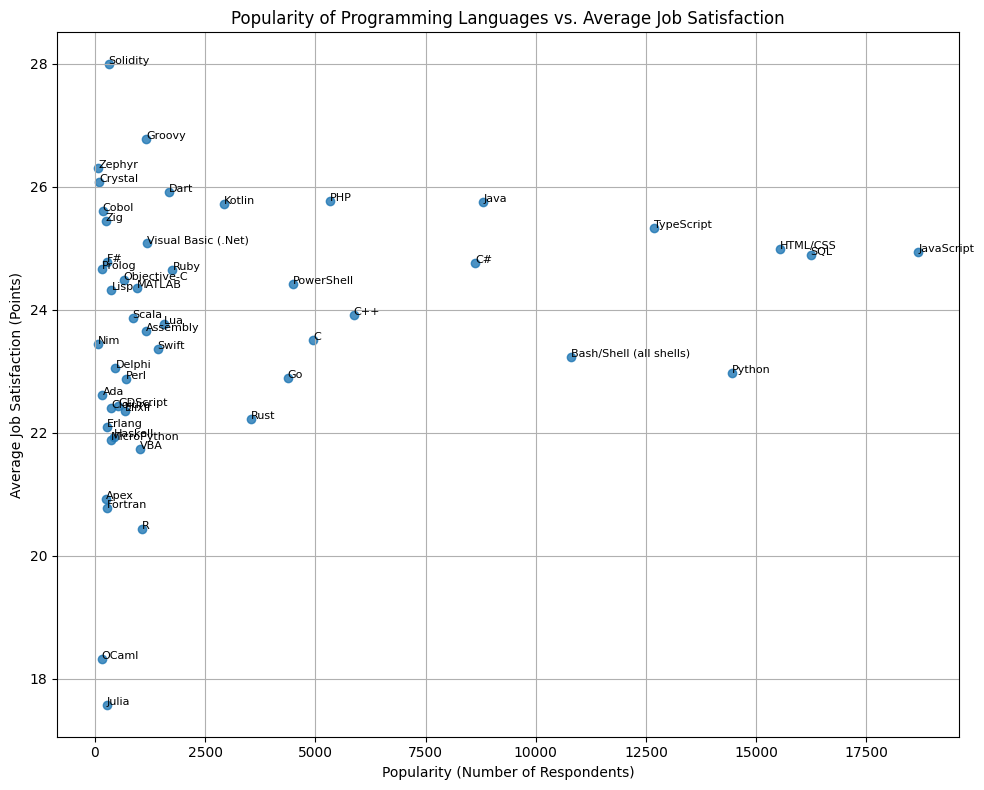

In [29]:
df_languages = df.copy()
# Drop rows where JobSatPoints_6 is NaN
df_languages.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'], inplace=True)

# Explode the 'LanguageHaveWorkedWith' column
df_languages_exploded = df_languages.assign(LanguageHaveWorkedWith=df_languages['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Calculate the average job satisfaction for each language
language_satisfaction = df_languages_exploded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean().sort_values()

# Get the number of respondents for each language (popularity)
language_popularity = df_languages_exploded['LanguageHaveWorkedWith'].value_counts()

# Combine the two series into a DataFrame
language_viz_df = pd.DataFrame({
    'Average Job Satisfaction': language_satisfaction,
    'Popularity': language_popularity
}).dropna() # Drop any languages that might not be in both series

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(language_viz_df['Popularity'], language_viz_df['Average Job Satisfaction'], alpha=0.8)

# Add labels for each language
for lang, row in language_viz_df.iterrows():
    plt.text(row['Popularity'], row['Average Job Satisfaction'], lang, fontsize=8, ha='left')


plt.title('Popularity of Programming Languages vs. Average Job Satisfaction')
plt.xlabel('Popularity (Number of Respondents)')
plt.ylabel('Average Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


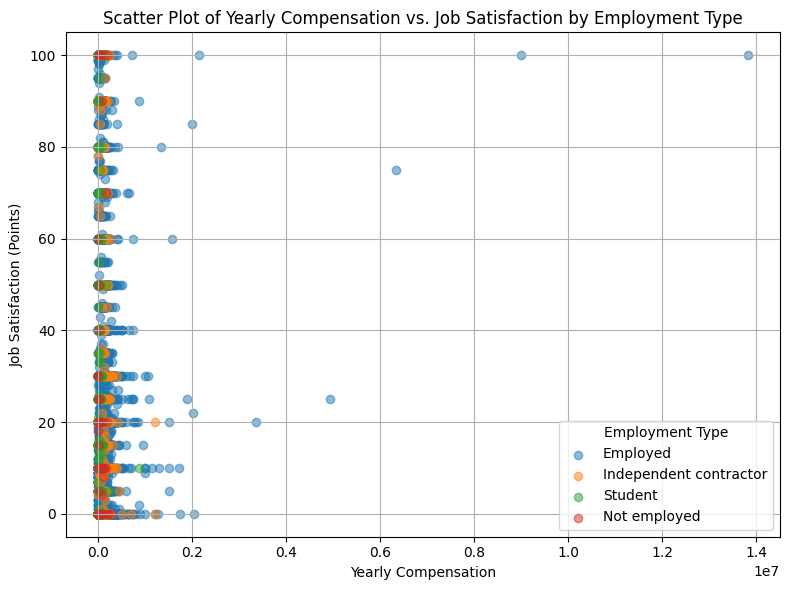

In [34]:
# Extract the first employment type if there are multiple
df_comp_sat['Employment_Group'] = df_comp_sat['Employment'].str.split(',').str[0]

# Get unique employment types for coloring/markers
employment_types = df_comp_sat['Employment_Group'].unique()

plt.figure(figsize=(8, 6))

# Plot scatter for each employment type
for employment_type in employment_types:
    df_subset = df_comp_sat[df_comp_sat['Employment_Group'] == employment_type]
    plt.scatter(
        df_subset['ConvertedCompYearly'],
        df_subset['JobSatPoints_6'],
        alpha=0.5,
        label=employment_type # Use employment type for the legend
    )

plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.legend(title='Employment Type') # Add a legend to identify colors/markers
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


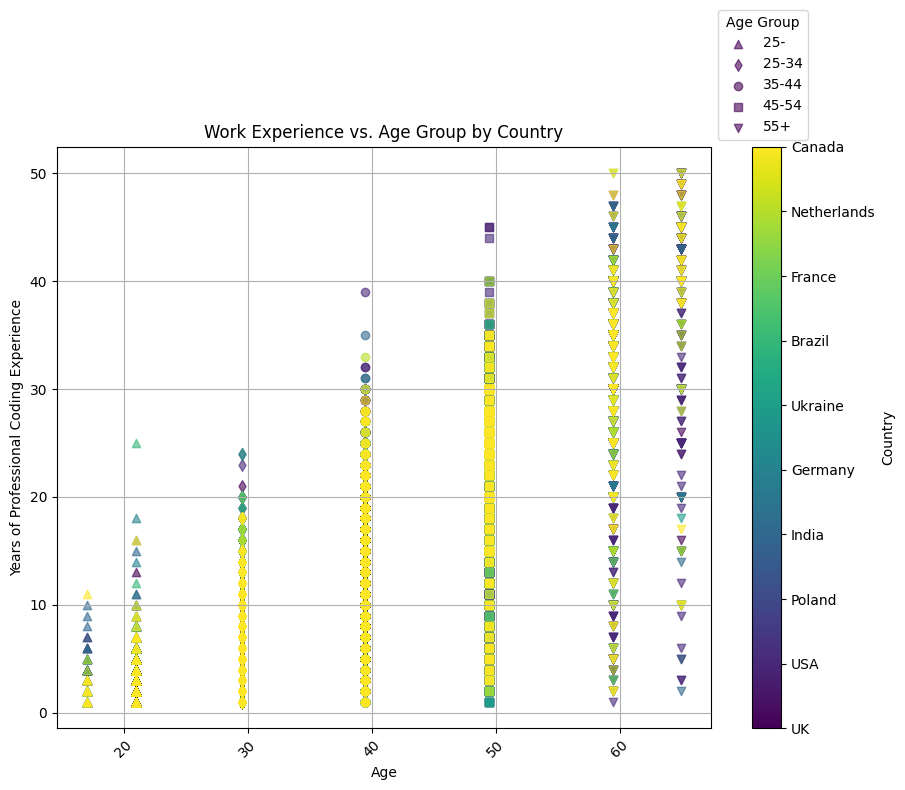

In [53]:
# Filter for a few common countries to keep the plot manageable
top_countries = df_experience['Country'].value_counts().nlargest(10).index.tolist()
df_country_age_experience = df_experience[df_experience['Country'].isin(top_countries)].copy()

# Define markers for different age groups
# Since 'Age_numeric' is continuous, let's categorize into broader age groups for markers
# Example: Under 25, 25-34, 35-44, 45-54, 55+
def categorize_age(age_numeric):
    if age_numeric < 25:
        return '25-'
    elif 25 <= age_numeric < 35:
        return '25-34'
    elif 35 <= age_numeric < 45:
        return '35-44'
    elif 45 <= age_numeric < 55:
        return '45-54'
    else:
        return '55+'

df_country_age_experience['Age_Group'] = df_country_age_experience['Age_numeric'].apply(categorize_age)


# Replace country names for better plotting
df_country_age_experience['Country'] = df_country_age_experience['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA'
})
# Get unique age groups and countries for plotting
age_groups = df_country_age_experience['Age_Group'].unique()
countries = df_country_age_experience['Country'].unique()

# Define markers for age groups
markers = ['o', 's', '^', 'd', 'v', 'P'] # Cycle through markers for age groups
marker_map = {group: markers[i % len(markers)] for i, group in enumerate(age_groups)}

# Create a single figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create a color map based on countries
country_colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))
color_map = {country: country_colors[i] for i, country in enumerate(countries)}


# Plot points for each age group with a distinct marker and color by country
for age_group in age_groups:
    df_age_subset = df_country_age_experience[df_country_age_experience['Age_Group'] == age_group]
    for country in countries:
         df_subset = df_age_subset[df_age_subset['Country'] == country]
         if not df_subset.empty: # Only plot if there are data points for this combination
             scatter = ax.scatter(
                df_subset['Age_numeric'],
                df_subset['YearsCodePro_numeric'],
                alpha=0.6,
                marker=marker_map[age_group], # Marker based on age group
                color=color_map[country], # Color based on country from the colormap
                label=f'{age_group}' if country == countries[0] else None # Label by age group for the legend (only once per group)
            )

# Create a color bar for the countries using the mapped colors
norm = plt.Normalize(0, len(countries) - 1)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=range(len(countries)), ax=ax) # Specify the axes for the colorbar
cbar.set_ticklabels(countries)
cbar.set_label('Country')


ax.set_title('Work Experience vs. Age Group by Country') # Use ax.set_title
ax.set_xlabel('Age') # Use ax.set_xlabel
ax.set_ylabel('Years of Professional Coding Experience') # Use ax.set_ylabel
ax.grid(True) # Use ax.grid
ax.tick_params(axis='x', rotation=45) # Use ax.tick_params for x-axis rotation

# Add a legend for the markers (Age Groups)
handles, labels = ax.get_legend_handles_labels() # Get handles and labels from the axes
# Filter out duplicate labels
unique_labels = list(dict.fromkeys(labels))
unique_labels.sort()
unique_handles = [handles[labels.index(label)] for label in unique_labels]

ax.legend(unique_handles, unique_labels, title='Age Group', loc='lower left', bbox_to_anchor=(1, 1)) # Use ax.legend


fig.tight_layout(rect=[0, 0, .75, 1]) # Adjust layout to make space for the legend outside the plot
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
